✅ Dataset Loaded Successfully
Shape of dataset: (206400, 13)
First 5 rows:
     MedInc   HouseAge  AveRooms  AveBedrms   Population  AveOccup   Latitude  \
0  8.337946  40.989590  6.993498   1.009935   321.998134  2.561516  37.888990   
1  8.291906  21.000548  6.236194   0.963616  2401.005067  2.115197  37.863015   
2  7.278110  51.984800  8.322140   1.076490   496.003546  2.791252  37.837464   
3  5.626955  51.999409  5.823953   1.078911   558.009119  2.538644  37.845054   
4  3.844031  52.009621  6.285424   1.093347   565.004889  2.182553  37.858845   

    Longitude  MedHouseVal   PopDensity  IncomePerHouseAge  BedroomsPerRoom  \
0 -122.247155        4.526   125.705574           0.198572         0.144410   
1 -122.207495        3.585  1135.115865           0.376895         0.154520   
2 -122.251611        3.521   177.698639           0.137362         0.129352   
3 -122.254313        3.413   219.805095           0.106170         0.185254   
4 -122.258579        3.422   258.872241    

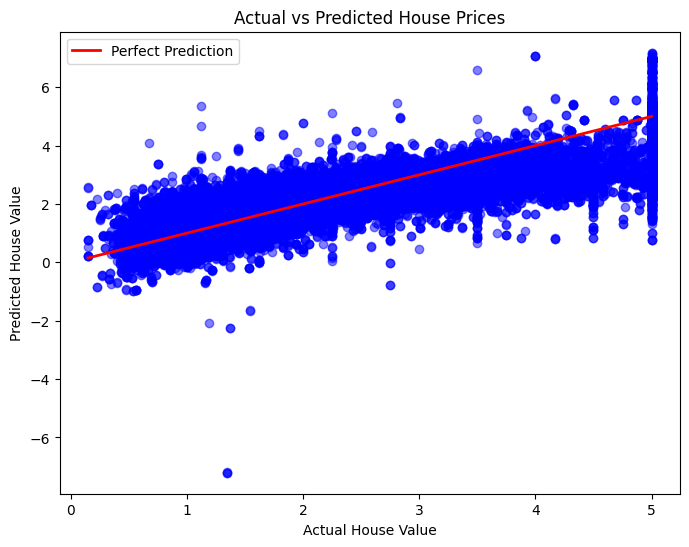


Feature Importance (Linear Regression Coefficients):
               Feature  Coefficient
10     BedroomsPerRoom     3.763842
0               MedInc     0.418323
2             AveRooms     0.081788
1             HouseAge     0.010357
5             AveOccup     0.000901
8           PopDensity     0.000684
11  PeoplePerHousehold     0.000684
4           Population    -0.000420
9    IncomePerHouseAge    -0.118997
3            AveBedrms    -0.227563
6             Latitude    -0.413365
7            Longitude    -0.417531


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("california_housing.csv")

print("✅ Dataset Loaded Successfully")
print("Shape of dataset:", df.shape)
print("First 5 rows:")
print(df.head())

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

print("\nNumber of features used for training:", X.shape[1])
print("Feature Names:", list(X.columns))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

print("\n✅ Model Trained Successfully")

y_pred = model.predict(X_test)

print("Sample Predictions vs Actual:")
print(pd.DataFrame({"Actual": y_test[:10].values, "Predicted": y_pred[:10]}))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation Results:")
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color="red", linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()

coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature Importance (Linear Regression Coefficients):")
print(coeff_df)
